# Project on Stock Price Prediction

# Problem Statement

Time series ase studies are one of the most challenging problems in finncial engineering forecast since it adds complexity of a sequence dependence among the input variables. Time series problems could be solved using traditional methods as well as deep learning algorithms. Time series problems are peculiar problems unlike regression analysis and stock price prediction is one such example where deep learning model would do benefit. The project makes use of LSTM model so as to give fair results for opening prices of stocks. For this, initially, RNN and LSTM, both the models would be run and  as per the evaluations, LSTM model would be used furtheron to check the deviations of real test data with the predicted test values using the LSTM model. Furthermore, it would also be complimented with proper visualization of plots, and also how much the test data is deviated form original train data set. So for this project, the train set of around 1250 rows would be used and a test set of about 20 rows would be used for checking the error and deviations

# Evaluation Parameters

Evaluation will be based on:
 Making use of RNN & LSTM models both so as to come to the conclusion which model would give favourable result
 After coming to a conclusion through visualisation, which model is giving better result, that particular model would be used on the test data set
 Comparing the trend of the real test data vs trend of the predicted data through rmse
 Plot the trends using Matplotlib

# Data Preparation

There are two data set : Training & Test. 
Since the training data set contains about 1250 rows, so initially the model would be run on this entire training file and then the model would be tested with entirely new data set which is test excel file. Deep Learning model works wonderfully when there are ample elements so further splitting in a training set has not been done for maintaining accuracy at user level. Dataset to be treated as time series with the row index as time. The independent variable should be a single column containing open google stock price

# Expected Outcome & Goals

These are the fllowing goals aligned with the project:

To understand the basic implemetation of the RNN and LSTM
To build the RNN & LSTM models layer by layer and understanding the significance of LSTM & RNN and the arguments used
Creating training and testing set from the same data by using the concept of time steps
Comparing the forecast of the actual and predicted stock prices
Understanding the significance of LSTM in terms of forecasting and its limitations
Evaluating the LSTM by RMSE value taken as a percentage of the orignal value

Expected Outcomes:
 Use multilayers LSTM to build models for stock forecasting
 Visually Compare the forecasted data with actual data and compare the trend.
 The trend of projected data should be relatively similar to actual data

# Steps

1. Reading the file & plotting some graph for initial analysis
2. Preprocessing (Feature scaling, checking tghe shape of the data, reshaping)
3. Building the RNN model and checking through visualisation about its prediction
4. Building the LSTM model and again checking through visualisation its prediction
5. Further, making the predictions on the test data set using LSTM model
6. Finding the rmse for the actual test & predicted test data for LSTM model and finding the precentage deviations from the original test data

In [105]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
!ls "/content/Google_Stock_Price_Train.csv"
path = "/content/Google_Stock_Price_Train.csv"

/content/Google_Stock_Price_Train.csv


# Reading the file

In [107]:
import numpy as np
import pandas as pd
import warnings  
warnings.filterwarnings('ignore') # to ignore the warnings
training = pd.read_csv(path)

In [108]:
training.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


For this project we would be considering open value of stock price, that is, we would be considering only one Date and Open for our analysis, so we would be dropping the other columns after some visualisation

In [109]:
training_copy=training.copy()

In [110]:
training_copy[["Month", "Day", "Year"]] = training_copy["Date"].str.split("/", expand = True)
training_copy.head()


,Date,Open,High,Low,Close,Volume,Month,Day,Year
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500",1,3,2012
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400",1,4,2012
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300",1,5,2012
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900",1,6,2012
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800",1,9,2012


The splitting of the date into date, month and year has been done so that by using group by command, we can do proper visualisation

# Checking the count of data year wise

In [111]:
training_copy["Year"].value_counts()

2015    252
2016    252
2014    252
2013    252
2012    250
Name: Year, dtype: int64

In [39]:
training_copy= training_copy[(training_copy['Open'] <=0)]
training_copy

,Date,Open,High,Low,Close,Volume,Month,Day,Year


# Plotting the graph month wise for each year with the opening prices on y axis

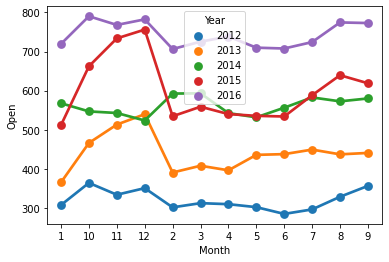

In [112]:
import seaborn as sns

#will make your plot outputs appear and be stored within the notebook.
%matplotlib inline 

grouped = pd.DataFrame(training_copy.groupby(['Year','Month'])['Open'].mean().reset_index())
sns.pointplot(x='Month', y='Open', hue='Year', data=grouped)

# Since the forecast would be on opening stock prices, thereby, dropping all the other columns and keeping Date & Open columns for further analysis

In [113]:
training_copy.drop(columns=[ 'High', "Low","Close", "Volume", "Day", "Month", "Year"], inplace=True)
training_copy

,Date,Open
0,1/3/2012,325.25
1,1/4/2012,331.27
2,1/5/2012,329.83
3,1/6/2012,328.34
4,1/9/2012,322.04
...,...,...
1253,12/23/2016,790.90
1254,12/27/2016,790.68
1255,12/28/2016,793.70
1256,12/29/2016,783.33


In [114]:
training_copy.set_index('Date', inplace=True)


# Plotting the original opening price wrt time

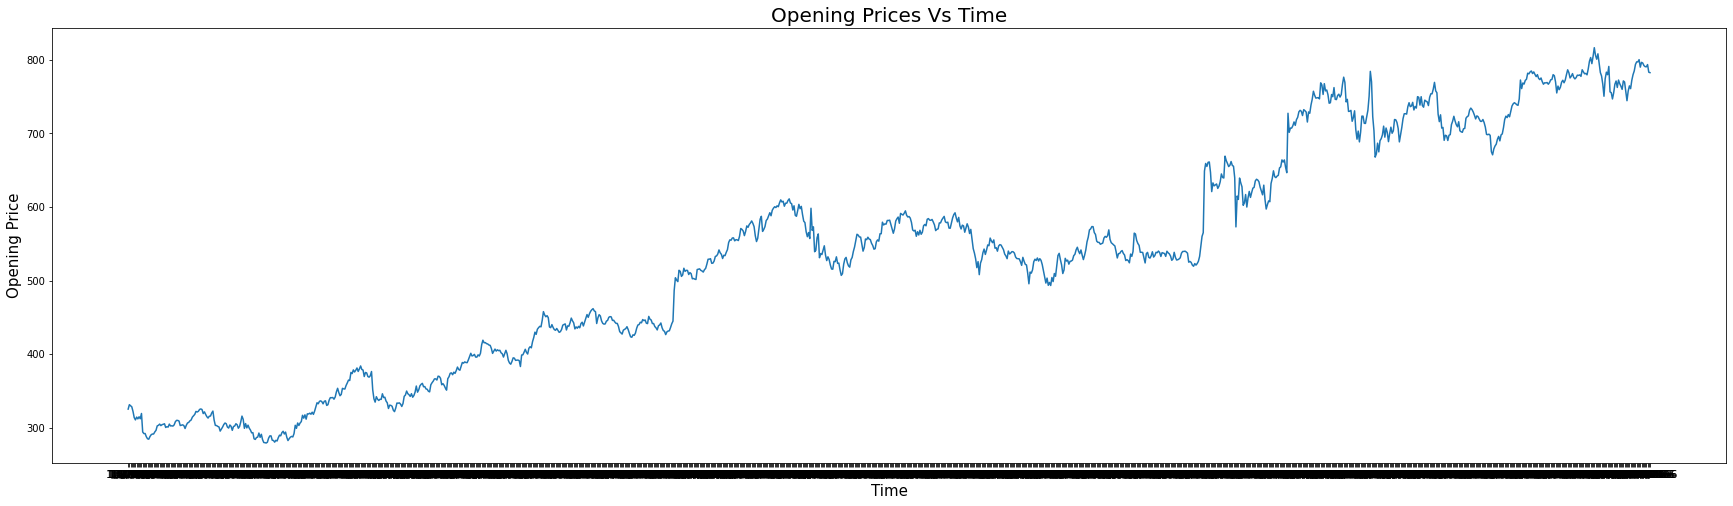

In [115]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30,8]

plt.xlabel("Time", fontsize = 15)
plt.ylabel("Opening Price", fontsize = 15)
plt.title('Opening Prices Vs Time', fontsize = 20)
plt.plot(training_copy)
plt.show()  

# Create a 2D array having observation and feature

In [52]:
real_stock_price_train = training.iloc[:, 1:2].values 

In [116]:
real_stock_price_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scaling

In [117]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training2 = sc.fit_transform(real_stock_price_train)

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one. Since the scaling of the data would be done between 0 and 1, therefore MinMax Scaler is preferable to use. The transformation is given by: 
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [118]:
training2

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [119]:
training2.shape

(1258, 1)

Since now the data consists of Date and Open for analysis, also the time series modelling adds complexity of a sequence dependence among the input variables. Just like when the computation takes place as to what would be the sales revenue over the forecast period, the past data is our only source of input as well as it is the only source through which the further forecasted output would be drawn. The data set consist of 1250 rows and for better accuracy sake this entire set would be considered the training data where these open prices input would be the source of giving the output predictions. So since the data set is not very large and also my past data is my source of input as well as output, thereby, I considered the first 1257 (1 to 1257)rows as my x_train and ( 2 to 1258 rows) as my y_train

In [120]:
# in the input we take
X_train = training2[0:1257]  
y_train = training2[1:1258]  # values shifted by 1

In [121]:
X_train

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95163331],
       [0.95725128],
       [0.93796041]])

In [122]:
X_train.shape

(1257, 1)

In [123]:
y_train

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [124]:
y_train.shape

(1257, 1)

The input values must be the stock prices at time t and the output values should be the stock prices at time t+1

# Reshaping the data 

We need to convert this 2D (observation and feature)array into a 3D array because it is a time series problem
So we need to add a time step of 1 because our input is stock price at time t and output is stock price at time t+1 and (t+1) - t = 1, hence 1 is the time step

In [125]:
X_train = np.reshape(X_train, (1257, 1, 1))
# (1257, 1, 1) the 2nd argument is no. of features and 3rd argument is the time step

In [126]:
X_train

array([[[0.08581368]],

       [[0.09701243]],

       [[0.09433366]],

       ...,

       [[0.95163331]],

       [[0.95725128]],

       [[0.93796041]]])

# Building the RNN Model

# Introduction on RNN 

Recurrent means the output at the current time step becomes the input to the next time step. At each element of teh sequence, the model considers not just the current input, but what it remembers about the preceding elements. RNN are a type of artificial neural network designed to recognize patterns in sequences of data. RNN makes use of backpropagation algorithm for training, but it is applied for every timestamp.

In [127]:
# importing libraries
from keras.models import Sequential  # initialize NN as a sequnce of layers
from keras.layers import Dense  # to add fully connected layers
from keras.layers import Embedding, SimpleRNN


model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['acc'])
history=model.fit(X_train,y_train, batch_size=32,epochs=50, shuffle=False)

Epoch 1/50
40/40 [==============================] - 4s 9ms/step - loss: 0.0826 - acc: 0.0000e+00
Epoch 2/50
40/40 [==============================] - 0s 9ms/step - loss: 0.1635 - acc: 0.0000e+00
Epoch 3/50
40/40 [==============================] - 0s 9ms/step - loss: 0.1214 - acc: 0.0000e+00
Epoch 4/50
40/40 [==============================] - 0s 10ms/step - loss: 0.1137 - acc: 0.0000e+00
Epoch 5/50
40/40 [==============================] - 0s 9ms/step - loss: 0.1097 - acc: 0.0000e+00
Epoch 6/50
40/40 [==============================] - 0s 9ms/step - loss: 0.1076 - acc: 0.0000e+00
Epoch 7/50
40/40 [==============================] - 0s 10ms/step - loss: 0.1058 - acc: 0.0000e+00
Epoch 8/50
40/40 [==============================] - 0s 10ms/step - loss: 0.1044 - acc: 0.0000e+00
Epoch 9/50
40/40 [==============================] - 0s 9ms/step - loss: 0.1034 - acc: 0.0000e+00
Epoch 10/50
40/40 [==============================] - 0s 10ms/step - loss: 0.1024 - acc: 0.0000e+00
Epoch 11/50
40/40 [======

# Predicting the original data so as to check how accurate the model is using RNN model

In [129]:
train_predict=model.predict(X_train)
train_predict = sc.inverse_transform(train_predict)
train_predict

array([[577.7116 , 589.12854, 563.46094, ..., 553.0276 , 570.4614 ,
        567.9954 ],
       [577.7116 , 589.12854, 563.46094, ..., 553.0276 , 570.4614 ,
        567.9954 ],
       [577.7116 , 589.12854, 563.46094, ..., 553.0276 , 570.4614 ,
        567.9954 ],
       ...,
       [577.7116 , 589.12854, 563.461  , ..., 553.0276 , 570.4614 ,
        567.9954 ],
       [577.7116 , 589.12854, 563.461  , ..., 553.0276 , 570.4614 ,
        567.9954 ],
       [577.7116 , 589.12854, 563.461  , ..., 553.0276 , 570.4614 ,
        567.9954 ]], dtype=float32)

# Plotting the graph for orginal data & predicted results using RNN model

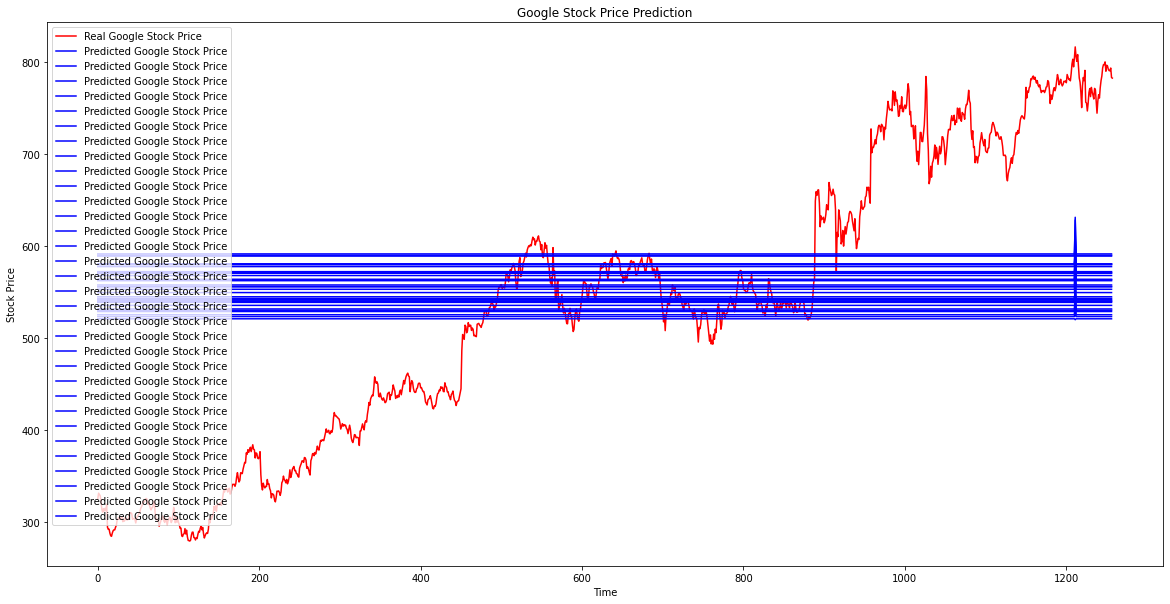

In [130]:
# visualizing the training results
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(real_stock_price_train, color = 'red', label='Real Google Stock Price')
plt.plot(train_predict, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Conclusion for RNN model

After running through the epoch cycle and predicting the data, the results has been plotted for the RNN model. The RNN model is not predicting the data correctly, which is clear through this visualisation, It seems that for every opening price, it is predicting the value in the range for 500 to 600, somewhere the mean value, its predicting, which clearly shws that RNN model is not apt for stock price prediction analysis, thereby, a better approach would be to go ahead with LSTM model


# Building the model using LSTM model

# Introduction on LSTM model

Long Short Term Memory networks are usually called "LSTM"They are a special kind of Recurrent Neural Networks which are capable of learning long term dependencies, since many a times, only recent data is needed in a model to perform operations. But there might be a requiremnet from a data which was obtained in the past. The first step in the LSTM modelling is to find out what was needed to be dropped. The second step consist of what new inputs is to be added to the network. The third step is to combine the previosuly obtained inputs to generate the new cell states and lasly, we arrived at the output as per our requirement. 

In [131]:
# importing libraries
from keras.models import Sequential  # initialize NN as a sequnce of layers
from keras.layers import Dense  # to add fully connected layers
from keras.layers import LSTM

In [132]:
model1=Sequential()
model1.add(LSTM(512,return_sequences=True,input_shape=(1,1)))
model1.add(LSTM(256,return_sequences=True))
model1.add(LSTM(128))
model1.add(Dense(1, activation="relu"))

model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['acc'])

In [133]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 1, 512)            1052672   
                                                                 
 lstm_4 (LSTM)               (None, 1, 256)            787456    
                                                                 
 lstm_5 (LSTM)               (None, 128)               197120    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,037,377
Trainable params: 2,037,377
Non-trainable params: 0
_________________________________________________________________


In [134]:
history=model1.fit(X_train,y_train, batch_size=32,epochs=50, shuffle=False)

Epoch 1/50
40/40 [==============================] - 7s 39ms/step - loss: 0.0247 - acc: 0.0016
Epoch 2/50
40/40 [==============================] - 2s 40ms/step - loss: 0.0695 - acc: 0.0016
Epoch 3/50
40/40 [==============================] - 2s 41ms/step - loss: 0.0365 - acc: 0.0016
Epoch 4/50
40/40 [==============================] - 2s 41ms/step - loss: 0.0197 - acc: 0.0016
Epoch 5/50
40/40 [==============================] - 2s 39ms/step - loss: 0.0040 - acc: 0.0016
Epoch 6/50
40/40 [==============================] - 2s 40ms/step - loss: 4.4848e-04 - acc: 0.0016
Epoch 7/50
40/40 [==============================] - 2s 41ms/step - loss: 6.7965e-04 - acc: 0.0016
Epoch 8/50
40/40 [==============================] - 2s 40ms/step - loss: 4.1827e-04 - acc: 0.0016
Epoch 9/50
40/40 [==============================] - 2s 42ms/step - loss: 4.1953e-04 - acc: 0.0016
Epoch 10/50
40/40 [==============================] - 2s 42ms/step - loss: 4.2550e-04 - acc: 0.0016
Epoch 11/50
40/40 [====================

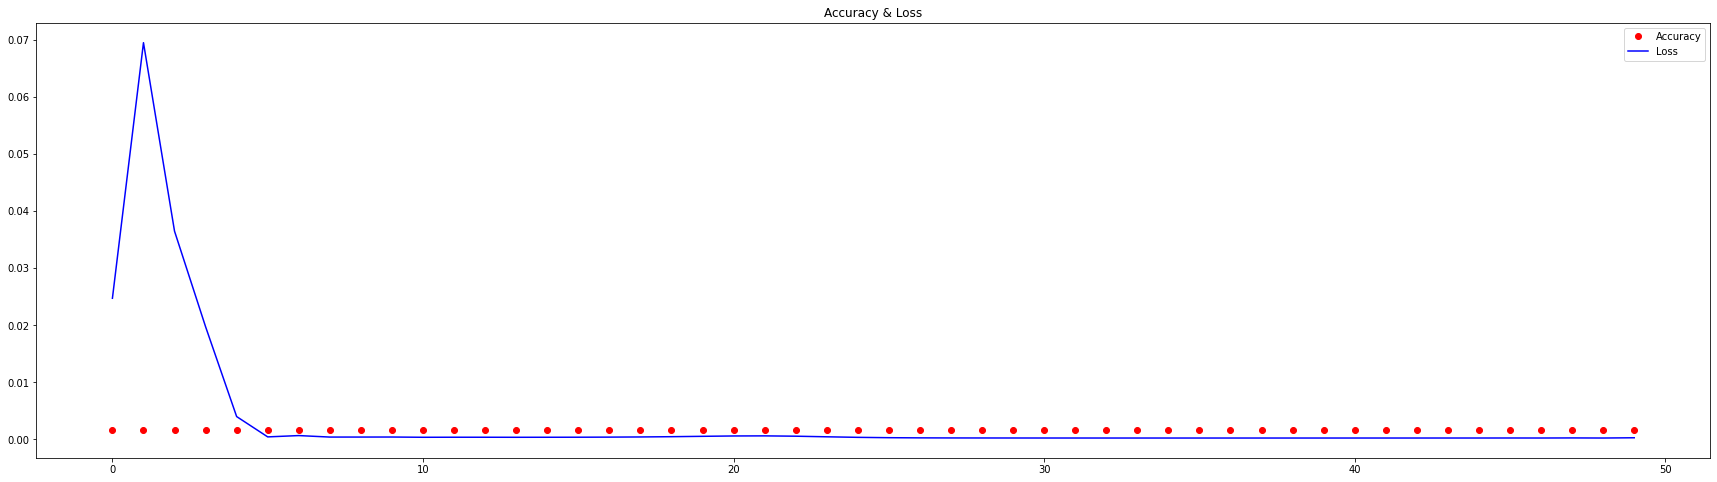

<Figure size 2160x576 with 0 Axes>

In [152]:
import matplotlib.pyplot as plt

acc = history.history['acc']

loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Accuracy')
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Accuracy & Loss')
plt.legend()

plt.figure()


plt.show()

# Predicting the original data using LSTM model

In [135]:
train_predict_lstm=model1.predict(X_train)
train_predict_lstm = sc.inverse_transform(train_predict_lstm)
train_predict_lstm

array([[329.8827],
       [336.1963],
       [334.6859],
       ...,
       [798.0888],
       [800.848 ],
       [791.3514]], dtype=float32)

In [136]:

train_predict_lstm.shape

(1257, 1)

# Plotting the graph for original data & the predicted results through LSTM model

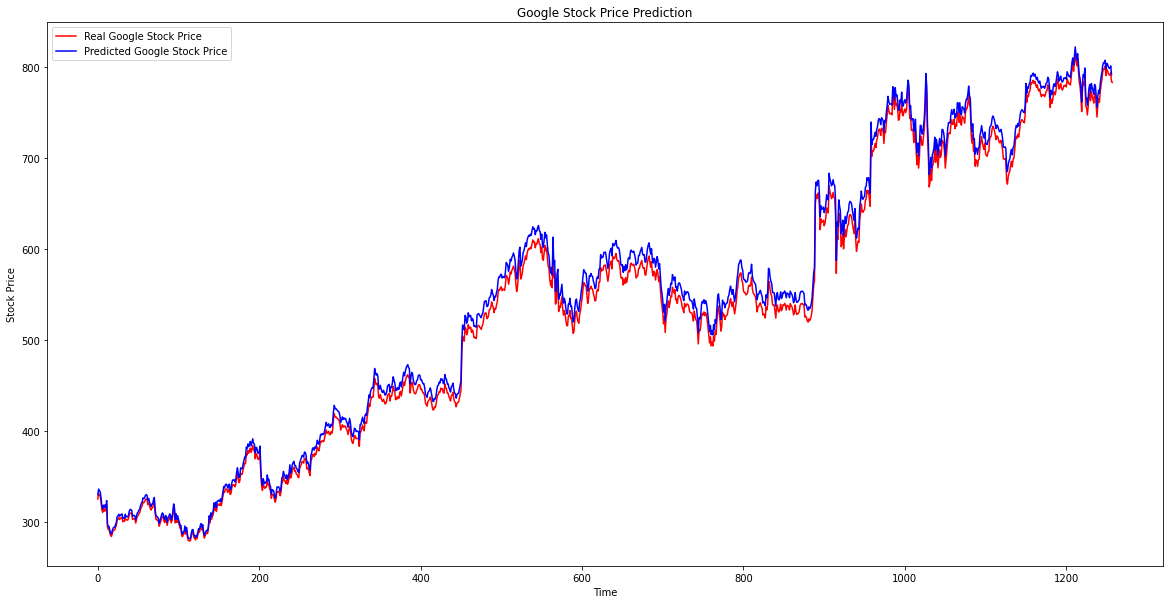

In [137]:
# visualizing the training results
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(real_stock_price_train, color = 'red', label='Real Google Stock Price')
plt.plot(train_predict_lstm, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Conclusion using LSTM model

After running the appropriate epoch cycles, and doing the predictions using LSTM model, the visualisation has been drawn for the original data and the predicted values. The results are quite in line with the original. Unlike RNN, it is simply not predicting the values in the range of 500 to 600 , in fact its quite accurate in giving the predictions for the original data set. Thereby, LSTM model can be used for stock price predictions. The test data set can further be analysed using this particular model and the mean square error can be calculated so that we can get to an understanding as to how well the model is able to predict the new data set. The predictions are actually following the real google stock prices

# Reading the test data set 

In [138]:
testing = pd.read_csv("/content/Google_Stock_Price_Test.csv")
testing.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [139]:
# taking the column of "open" value of stock price
real_stock_price_test = testing.iloc[:, 1:2].values

In [140]:
real_stock_price_test

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

# Feature Scaling for Test Data

Performing the similar preprocessing as was done was training set

In [141]:
# feature Scaling
inputs = sc.transform(real_stock_price_test)

Note: We do only ".transform" and not "fit.transform" and we use the same scaler 'sc' we used while standardzing the training data because the scaling should be done with respect to the training data and not the testing set because the minimum and maximum of the training and testing sets may vary

In [142]:
# reshaping
inputs = np.reshape(inputs, (20, 1, 1))

# Predicting the test data set using the LSTM model which we built 

In [143]:
# predicting the stock price (for the year 2017)
predicted_stock_price_test = model1.predict(inputs)     # but these are the scaled values

In [144]:
predicted_stock_price_test

array([[0.9451462 ],
       [0.96146566],
       [0.95757836],
       [0.97319597],
       [0.99202514],
       [0.9944827 ],
       [0.9896662 ],
       [0.99327105],
       [0.9938433 ],
       [0.9931701 ],
       [0.9910313 ],
       [0.9898686 ],
       [0.9928838 ],
       [0.9934561 ],
       [1.0186617 ],
       [1.0308287 ],
       [1.0443695 ],
       [1.0392532 ],
       [1.005898  ],
       [0.9759087 ]], dtype=float32)

In [145]:
predicted_stock_price_test = sc.inverse_transform(predicted_stock_price_test)
predicted_stock_price_test

array([[787.19275],
       [795.9655 ],
       [793.87585],
       [802.27124],
       [812.393  ],
       [813.7141 ],
       [811.12494],
       [813.0628 ],
       [813.37036],
       [813.00854],
       [811.85876],
       [811.23376],
       [812.8546 ],
       [813.16223],
       [826.7118 ],
       [833.25226],
       [840.53125],
       [837.78094],
       [819.8505 ],
       [803.7295 ]], dtype=float32)

In [146]:
predicted_stock_price_test.shape

(20, 1)

# Plotting the graph for original test & predicted test data using LSTM model

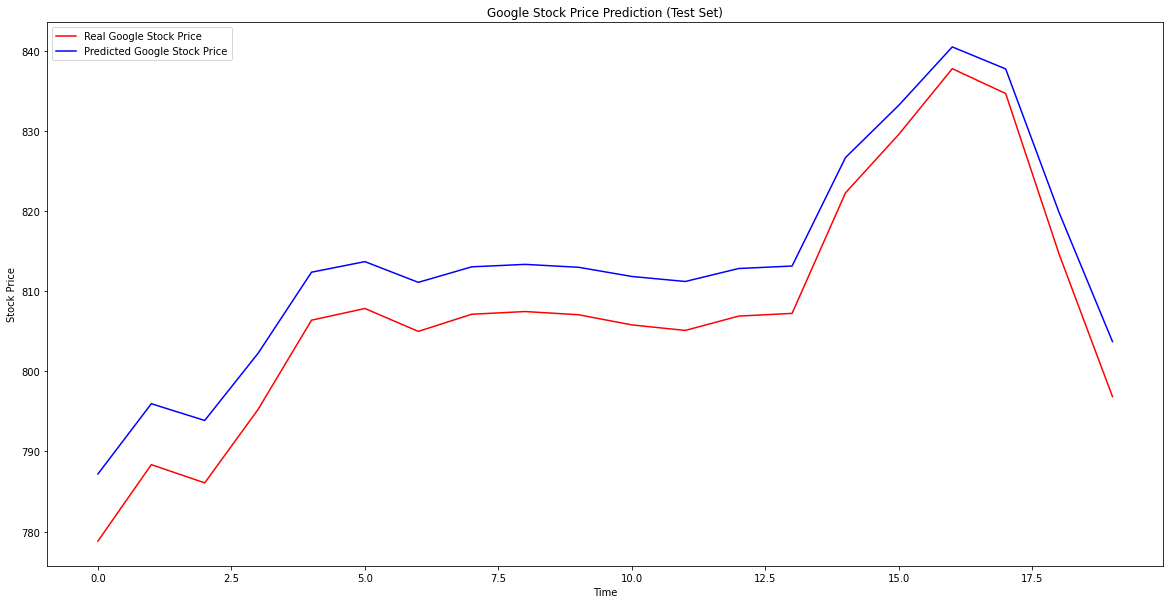

In [147]:
# visualizing the results for testing
plt.figure(figsize=(20,10))
plt.plot(real_stock_price_test, color = 'red', label='Real Google Stock Price')
plt.plot(predicted_stock_price_test, color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction (Test Set)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

It is seen that the predictions are actually following the real google stock prices.

As amazing as that sounds it would be hard to get such close predictions because in finance, the future variations may not always be dependent on the past, hence its nearly impossible to make long term predictions of stock price since at the end we must not forget that after all its stock prices and sometimes stocks prices shows altogether a very different result too

# Evaluation of RMSE

It is a way of figuring out how much a model disagrees with the actual data

In [148]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(real_stock_price_test, predicted_stock_price_test))
print('The RMSE value is', rmse)

The RMSE value is 5.993978590701665


We need to express this as percentage of the orignal value coz it may tell there is a prediction error of 7, but that error won't mean the same thing whether the orignal stock price was betn 1 and 10 or betn 1000 and 10000¶

In [149]:
print('RMSE in terms of % of the orignal value is', round((rmse/real_stock_price_test.mean()*100), 2) , '%')   
# we take the avg because it would be a true representative of the real stock values

RMSE in terms of % of the orignal value is 0.74 %


# Generally a good rmse expressed in terms of percentage is around or less than 1%